# __Stage 1__: Emissions – AIS Data from 2023



### import data using `ship.py`:

In [1]:
from app import *

a = App(r'./data/ais_data')

created new cruise for this: NORWEGIAN BLISS_01
created new cruise for this: NORWEGIAN BLISS_02
created new cruise for this: NORWEGIAN JEWEL_01
created new cruise for this: EURODAM_01
created new cruise for this: NORWEGIAN BLISS_03
created new cruise for this: NIEUW AMSTERDAM_01
created new cruise for this: GRAND PRINCESS_01
created new cruise for this: KONINGSDAM_01
created new cruise for this: NORWEGIAN JEWEL_02
created new cruise for this: NORWEGIAN SPIRIT_01
created new cruise for this: CROWN PRINCESS_01
created new cruise for this: EURODAM_02
created new cruise for this: GRAND PRINCESS_02
created new cruise for this: KONINGSDAM_02
created new cruise for this: NORWEGIAN BLISS_04
created new cruise for this: NOORDAM_01
created new cruise for this: NORWEGIAN ENCORE_01
created new cruise for this: RUBY PRINCESS_01
created new cruise for this: NIEUW AMSTERDAM_02
created new cruise for this: NORWEGIAN SPIRIT_02
created new cruise for this: VOLENDAM_01
created new cruise for this: NORWEG

### Preliminary scratch work

In [2]:
boatsData = a.boatsData
#boatsData.import_claa_data()
visit_table, visit_count_table, popular_next_ports_table, merged, count_glba_visits = boatsData.run_glba_workflow()
assert(count_glba_visits + 65 == 258)
visit_table

processing NORWEGIAN BLISS
processing NORWEGIAN JEWEL
processing EURODAM
processing NIEUW AMSTERDAM
processing GRAND PRINCESS
processing KONINGSDAM
processing NORWEGIAN SPIRIT
processing CROWN PRINCESS
processing NOORDAM
processing NORWEGIAN ENCORE
processing RUBY PRINCESS
processing VOLENDAM
processing NORWEGIAN SUN
processing SEABOURN ODYSSEY
processing VIKING ORION


,index,date,boatName,mmsi,portAfter,portBefore,ts_in,ts_out,timeTo,distTo,arrival,segment_id
0,0,2023-04-19,NORWEGIAN BLISS,num,Ketchikan,Skagway,2023-04-19 06:11:19-08:00,2023-04-19 14:34:25-08:00,16.19,299.91,2023-04-20 06:45:41-08:00,5
1,1,2023-04-26,NORWEGIAN BLISS,num,Ketchikan,Skagway,2023-04-26 06:13:39-08:00,2023-04-26 15:01:27-08:00,15.81,300.57,2023-04-27 06:50:14-08:00,13
2,18,2023-05-02,EURODAM,num,Icy Strait Point,Juneau,2023-05-02 06:35:16-08:00,2023-05-02 15:18:13-08:00,2.55,29.28,2023-05-02 17:51:08-08:00,3
3,2,2023-05-03,NORWEGIAN BLISS,num,Ketchikan,Skagway,2023-05-03 06:11:13-08:00,2023-05-03 14:49:12-08:00,15.99,301.96,2023-05-04 06:48:19-08:00,19
4,40,2023-05-04,NIEUW AMSTERDAM,num,Ketchikan,Skagway,2023-05-04 05:59:19-08:00,2023-05-04 15:06:28-08:00,19.71,329.22,2023-05-05 10:49:18-08:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...
188,5,2023-10-18,NORWEGIAN BLISS,num,Ketchikan,Skagway,2023-10-18 07:58:35-08:00,2023-10-18 15:45:29-08:00,15.43,301.17,2023-10-19 07:11:28-08:00,215
189,148,2023-10-19,NORWEGIAN ENCORE,num,Ketchikan,Skagway,2023-10-19 07:49:18-08:00,2023-10-19 16:00:01-08:00,15.05,302.49,2023-10-20 07:02:56-08:00,145
190,184,2023-10-24,NORWEGIAN SUN,num,Juneau,Skagway,2023-10-24 07:12:33-08:00,2023-10-24 15:48:46-08:00,14.45,205.99,2023-10-25 06:15:55-08:00,221
191,6,2023-10-25,NORWEGIAN BLISS,num,Ketchikan,Skagway,2023-10-25 08:04:14-08:00,2023-10-25 15:37:12-08:00,14.96,302.54,2023-10-26 06:34:53-08:00,219


In [3]:
visit_count_table

NORWEGIAN ENCORE    25
EURODAM             22
KONINGSDAM          22
NIEUW AMSTERDAM     21
GRAND PRINCESS      20
VOLENDAM            20
NOORDAM             19
NORWEGIAN JEWEL     11
NORWEGIAN SUN        8
NORWEGIAN BLISS      7
RUBY PRINCESS        7
SEABOURN ODYSSEY     4
VIKING ORION         4
NORWEGIAN SPIRIT     2
CROWN PRINCESS       1
Name: boatName, dtype: int64

In [4]:
popular_next_ports_table

Ketchikan           80
Skagway             34
Whittier            28
Icy Strait Point    27
Seward              10
Juneau               4
Sitka                3
Prince Rupert        2
Wrangell             2
Valdez               2
Haines               1
Name: portAfter, dtype: int64

In [66]:
b = a.boatsData.boatsDataDictionary['VOLENDAM']
b.cruisesDataDictionary['VOLENDAM_03'].geoprocessor.portManager.assignPorts()
from Statistics import Statistics
c = Statistics.summary_table(boatsData = a.boatsData,
                         group_field = 'cruise_id',
                         stats_fields = ['sog'],
                         stats_type = ['mean', 'std', 'count'])
c

AttributeError: 'NoneType' object has no attribute 'portManager'

In [ ]:

data = {}
rows_count = 0

for boat_name, boat_data in a.boatsData.boatsDataDictionary.items():
    print(f"Boat: {boat_name}")
    for cruise_id, cruise_data in boat_data.cruisesDataDictionary.items():
        print(cruise_data.data)
        rows_count += len(cruise_data.data)
        cruise_data.data['time_diff'] = cruise_data.data['bs_ts'].diff()
        cruise_data.data = cruise_data.data.dropna(subset=['time_diff'])
        cruise_data.data['time_diff_seconds'] = cruise_data.data['time_diff'].dt.total_seconds()
        cruise_data.data['time_diff_hours'] = cruise_data.data['time_diff_seconds']/3600
        data[cruise_id] = cruise_data.data

print(f"total count of rows imported : {rows_count}")

print(data)

In [ ]:
from ship import *
from app import *

a = App(r'/Users/Graham/cruise/ais_data')

sum_of_points = 0
for boat_name, boat_data in a.boatsData.boatsDataDictionary.items():
    print(f"Boat: {boat_name}")
    for cruise_id, cruise_data in boat_data.cruisesDataDictionary.items():
        print(f"  Cruise ID: {cruise_id}")
        print(f"    {min(cruise_data.days).strftime('%Y/%m/%d')} - {max(cruise_data.days).strftime('%Y/%m/%d')}")
        print(f"       data points: {len(cruise_data.data)}")
        sum_of_points += len(cruise_data.data)

print(f'Expected point count: {a.rowsParsedCount}, actual point count: {sum_of_points}, nan point count: {len(a.boatsData.nanData)}, condition is: {sum_of_points+len(a.boatsData.nanData) == a.rowsParsedCount}')


In [10]:
# flatten a boatData to a big table with cruiseID as an attribute
from ship import *
from app import *

a = App(r'/Users/Graham/cruise/ais_data')

sum_of_points = 0
for boat_name, boat_data in a.boatsData.boatsDataDictionary.items():
    print(f"Boat: {boat_name}")
    df = pd.DataFrame()
    for cruise_id, cruise_data in boat_data.cruisesDataDictionary.items():
        cruise_data.dataToGeodata()
        cruise_data.assignPorts()
        print(f"  Cruise ID: {cruise_id}")
        print(f"    {min(cruise_data.days).strftime('%Y/%m/%d')} - {max(cruise_data.days).strftime('%Y/%m/%d')}")
        print(f"       data points: {len(cruise_data.gdf)}")
        sum_of_points += len(cruise_data.gdf)

        #add to boatData table with updated cruiseID attribute
        cruise_data.gdf['cruiseID'] = cruise_id
        print(cruise_data.gdf.columns)
        df = pd.concat([df, cruise_data.gdf[['name','bs_ts','cruiseID', 'filled_port', 'nav_status']]], ignore_index=True)
    df.to_csv(f'./products/{boat_name.replace(" ", "")}_concat.csv')



print(f'Expected point count: {a.rowsParsedCount}, actual point count: {sum_of_points}, nan point count: {len(a.boatsData.nanData)}, condition is: {sum_of_points+len(a.boatsData.nanData) == a.rowsParsedCount}')




initializing for NORWEGIAN BLISS
sorting
new cruise identified for NORWEGIAN BLISS
incremented and added a cruise at NORWEGIAN BLISS_02
initializing for NORWEGIAN JEWEL
initializing for EURODAM
sorting
new cruise identified for NORWEGIAN BLISS
incremented and added a cruise at NORWEGIAN BLISS_03
initializing for NIEUW AMSTERDAM
initializing for GRAND PRINCESS
initializing for KONINGSDAM
sorting
new cruise identified for NORWEGIAN JEWEL
incremented and added a cruise at NORWEGIAN JEWEL_02
initializing for NORWEGIAN SPIRIT
initializing for CROWN PRINCESS
sorting
new cruise identified for EURODAM
incremented and added a cruise at EURODAM_02
sorting
new cruise identified for GRAND PRINCESS
incremented and added a cruise at GRAND PRINCESS_02
sorting
new cruise identified for KONINGSDAM
incremented and added a cruise at KONINGSDAM_02
sorting
new cruise identified for NORWEGIAN BLISS
incremented and added a cruise at NORWEGIAN BLISS_04
initializing for NOORDAM
initializing for NORWEGIAN ENCOR

In [ ]:
for key, value in data.items():
    df = value
    top_differences = df.nlargest(50, 'time_diff_hours')  # Get the top 10 largest differences
    print(key)
    print(top_differences[['bs_ts', 'time_diff_hours']])
    print()

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data['VIKING ORION_01']['time_diff_seconds'], bins=100, edgecolor='k', alpha=0.7)
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Differences Between Consecutive Timestamps')
plt.grid(True)
plt.show()

In [278]:
#If data entry (Cruise type) visits glacier bay, print name: 
count_all = 0
count_glba = 0

data = {}
data2 = {}
for boat_name, boat_data in a.boatsData.boatsDataDictionary.items():
    print(f"Boat: {boat_name}")
    for cruise_id, cruise_data in boat_data.cruisesDataDictionary.items():
        count_all+=1
        data2[cruise_id] = cruise_data
        if cruise_data.visitsGlacierBay():
            count_glba+=1
            data[cruise_id] = cruise_data
            print(f"  Cruise ID: {cruise_id}")
            print(f"    {min(cruise_data.days).strftime('%Y/%m/%d')} - {max(cruise_data.days).strftime('%Y/%m/%d')}")
            print(f"       data points: {len(cruise_data.data)}")
        continue

Boat: NORWEGIAN BLISS
  Cruise ID: NORWEGIAN BLISS_01
    2023/04/16 - 2023/04/20
       data points: 2217
  Cruise ID: NORWEGIAN BLISS_02
    2023/04/23 - 2023/04/27
       data points: 2351
  Cruise ID: NORWEGIAN BLISS_03
    2023/04/30 - 2023/05/04
       data points: 2231
  Cruise ID: NORWEGIAN BLISS_27
    2023/10/01 - 2023/10/05
       data points: 2328
  Cruise ID: NORWEGIAN BLISS_28
    2023/10/08 - 2023/10/12
       data points: 2376
  Cruise ID: NORWEGIAN BLISS_29
    2023/10/15 - 2023/10/19
       data points: 2043
  Cruise ID: NORWEGIAN BLISS_30
    2023/10/22 - 2023/10/26
       data points: 2517
Boat: NORWEGIAN JEWEL
  Cruise ID: NORWEGIAN JEWEL_02
    2023/05/02 - 2023/05/13
       data points: 6358
  Cruise ID: NORWEGIAN JEWEL_03
    2023/05/16 - 2023/05/27
       data points: 6105
  Cruise ID: NORWEGIAN JEWEL_04
    2023/05/30 - 2023/06/10
       data points: 6467
  Cruise ID: NORWEGIAN JEWEL_05
    2023/06/13 - 2023/06/24
       data points: 6326
  Cruise ID: NORWEGIA

### Assigning data subset that visits GLBA

In [8]:
#If data entry (Cruise type) visits glacier bay, print name: 
count_all = 0
count_glba = 0

data = {}
data2 = {}
for boat_name, boat_data in a.boatsData.boatsDataDictionary.items():
    print(f"Boat: {boat_name}")
    for cruise_id, cruise_data in boat_data.cruisesDataDictionary.items():
        count_all+=1
        data2[cruise_id] = cruise_data
        if cruise_data.geoprocessor.portManager.visitsGlacierBay():
            count_glba+=1
            data[cruise_id] = cruise_data
            print(f"  Cruise ID: {cruise_id}")
            print(f"    {min(cruise_data.days).strftime('%Y/%m/%d')} - {max(cruise_data.days).strftime('%Y/%m/%d')}")
            print(f"       data points: {len(cruise_data.data)}")
        continue

Boat: NORWEGIAN BLISS
  Cruise ID: NORWEGIAN BLISS_01
    2023/04/16 - 2023/04/20
       data points: 2217
  Cruise ID: NORWEGIAN BLISS_02
    2023/04/23 - 2023/04/27
       data points: 2351
  Cruise ID: NORWEGIAN BLISS_03
    2023/04/30 - 2023/05/04
       data points: 2231
  Cruise ID: NORWEGIAN BLISS_25
    2023/10/01 - 2023/10/05
       data points: 2328
  Cruise ID: NORWEGIAN BLISS_26
    2023/10/08 - 2023/10/12
       data points: 2376
  Cruise ID: NORWEGIAN BLISS_27
    2023/10/15 - 2023/10/19
       data points: 2043
  Cruise ID: NORWEGIAN BLISS_28
    2023/10/22 - 2023/10/26
       data points: 2517
Boat: NORWEGIAN JEWEL
  Cruise ID: NORWEGIAN JEWEL_02
    2023/05/02 - 2023/05/13
       data points: 6358
  Cruise ID: NORWEGIAN JEWEL_03
    2023/05/16 - 2023/05/27
       data points: 6105
  Cruise ID: NORWEGIAN JEWEL_04
    2023/05/30 - 2023/06/10
       data points: 6467
  Cruise ID: NORWEGIAN JEWEL_05
    2023/06/13 - 2023/06/24
       data points: 6326
  Cruise ID: NORWEGIA

In [9]:
print(f'count of cruises visiting glba in data scope: {count_glba}')
print(f'the length of the dict is {len(data)}')
print(f'total count of cruises read: {count_all}')

count of cruises visiting glba in data scope: 164
the length of the dict is 164
total count of cruises read: 244


In [4]:
ais_data = data
#this is the data we will work with from now on

In [215]:
out = {}
for key, value in data2.items():
    pd.to_datetime(value.gdf['bs_ts'])
    dates = value.gdf["bs_ts"].dt.day.unique()
    duration = len(dates)
    print(f'at {key}: {duration}')
    out[key] = duration

at NORWEGIAN BLISS_01: 5
at NORWEGIAN BLISS_02: 5
at NORWEGIAN BLISS_03: 5
at NORWEGIAN BLISS_04: 5
at NORWEGIAN BLISS_05: 5
at NORWEGIAN BLISS_06: 1
at NORWEGIAN BLISS_07: 4
at NORWEGIAN BLISS_08: 5
at NORWEGIAN BLISS_09: 5
at NORWEGIAN BLISS_10: 5
at NORWEGIAN BLISS_11: 5
at NORWEGIAN BLISS_12: 5
at NORWEGIAN BLISS_13: 5
at NORWEGIAN BLISS_14: 5
at NORWEGIAN BLISS_15: 5
at NORWEGIAN BLISS_16: 5
at NORWEGIAN BLISS_17: 5
at NORWEGIAN BLISS_18: 5
at NORWEGIAN BLISS_19: 5
at NORWEGIAN BLISS_20: 5
at NORWEGIAN BLISS_21: 5
at NORWEGIAN BLISS_22: 5
at NORWEGIAN BLISS_23: 5
at NORWEGIAN BLISS_24: 1
at NORWEGIAN BLISS_25: 4
at NORWEGIAN BLISS_26: 5
at NORWEGIAN BLISS_27: 5
at NORWEGIAN BLISS_28: 5
at NORWEGIAN BLISS_29: 5
at NORWEGIAN BLISS_30: 5
at NORWEGIAN JEWEL_01: 2
at NORWEGIAN JEWEL_02: 13
at NORWEGIAN JEWEL_03: 13
at NORWEGIAN JEWEL_04: 13
at NORWEGIAN JEWEL_05: 13
at NORWEGIAN JEWEL_06: 13
at NORWEGIAN JEWEL_07: 13
at NORWEGIAN JEWEL_08: 13
at NORWEGIAN JEWEL_09: 13
at NORWEGIAN JEWE

In [219]:
test = []
for _, value in out.items():

test

AttributeError: 'builtin_function_or_method' object has no attribute 'value_counts'

#### Scratch area for building GLBA subset table

In [5]:
ais_data = data

In [ ]:
output_data = gpd.GeoDataFrame([new_row], geometry=[line], crs=self.gdf.crs)

In [ ]:
for key, value in ais_data.items():
    

In [ ]:
line = LineString(self.gdf.loc[start_index:end_index].geometry.values)

In [ ]:
def formatCruiseToCLAA(cruise):
    
    new_row = {
            'cruiseID': self.cruiseID,
            'boatName': self.boatName,
            'portCode': None,
            'ts_in': str(max(self.days)),
            'ts_out': str(self.getLastTimestampInGlacierBay()),
            'portName': self.getPortAfterGlacierBay(),
            'nextPort' : None,
            'distance' : distance,
            'time' : time
        }
    

In [5]:
from app import *

data_folder = r'/Users/Graham/cruise/ais_data'

a = App(data_folder)

cruises = {}

result = pd.DataFrame(columns=['port','cruise_id'])

big_line_gdf = gpd.GeoDataFrame()

for boat_name, boat_data in a.boatsData.boatsDataDictionary.items():
    print(f"Boat: {boat_name}")
    for cruise_id, cruise_data in boat_data.cruisesDataDictionary.items():
        print(f"  Cruise ID: {cruise_id}")
        print(f"    {min(cruise_data.days).strftime('%Y/%m/%d')} - {max(cruise_data.days).strftime('%Y/%m/%d')}")
        print(f"       data points: {len(cruise_data.data)}")
        if cruise_data.visitsGlacierBay():
            cruises[cruise_id] = cruise_data
            #cruise_data.appendToLineShapefile(os.path.join('out_shp', 'cruises_visitsGlacierBay.shp'))

rows_to_append = []

for cruise_id, cruise_data in cruises.items():
    cruise_data.assignPorts()
    #port = cruise_data.getPortAfterGlacierBay()

    # Create a dictionary for the new row
    new_row = {
            'cruiseID': cruise_data.cruiseID,
            'boatName': cruise_data.boatName,
            'portCode': None,
            'ts_in': str(max(cruise_data.days)),
            'ts_out': str(cruise_data.getLastTimestampInGlacierBay()),
            'portName': ,
            'nextPort' : cruise_data.getPortAfterGlacierBay(),
            'distance' : distance,
            'time' : time
        }
    new_row = {
            'cruiseID': cruise_data.cruiseID,
            'boatName': cruise_data.boatName,
            'startDate': str(min(cruise_data.days)),
            'endDate': str(max(cruise_data.days)),
            'departGLBA': str(cruise_data.getLastTimestampInGlacierBay()),
            'afterGLBA': cruise_data.getPortAfterGlacierBay(),
            'distance' : PathCalculations.distanceAlongPath(self.gdf.geometry, self.gdf.index[0], self.gdf.index[-1])[1],
            'time' : PathCalculations.timelapseAlongPath(self.gdf.bs_ts, self.gdf.index[0], self.gdf.index[-1])
        }
    new_row = {'port': port, 'cruise_id': cruise_id}
    rows_to_append.append(new_row)

# Append all new rows to the result DataFrame at once
result = pd.concat([result, pd.DataFrame(rows_to_append)], ignore_index=True)

print(result)
print(result.port.value_counts())



new cruise found for NORWEGIAN BLISS
new cruise found for NORWEGIAN BLISS
new cruise found for NORWEGIAN JEWEL
new cruise found for KONINGSDAM
new cruise found for EURODAM
new cruise found for GRAND PRINCESS
new cruise found for KONINGSDAM
new cruise found for NORWEGIAN BLISS
new cruise found for NIEUW AMSTERDAM
new cruise found for NORWEGIAN SPIRIT
new cruise found for NIEUW AMSTERDAM
new cruise found for CROWN PRINCESS
new cruise found for NORWEGIAN SUN
new cruise found for SEABOURN ODYSSEY
new cruise found for VIKING ORION
new cruise found for EURODAM
new cruise found for KONINGSDAM
new cruise found for NORWEGIAN BLISS
new cruise found for NOORDAM
new cruise found for NORWEGIAN ENCORE
new cruise found for NORWEGIAN JEWEL
new cruise found for VOLENDAM
new cruise found for RUBY PRINCESS
new cruise found for RUBY PRINCESS
new cruise found for EURODAM
new cruise found for GRAND PRINCESS
new cruise found for KONINGSDAM
new cruise found for NORWEGIAN BLISS
new cruise found for VIKING ORIO

In [ ]:
 def toLineShapefile(cruiseID, filepath, start_index, end_index):
        #print(cruise.gdf)
        if start_index and end_index:
            line = LineString(self.gdf.loc[start_index:end_index].geometry.values)
            distance = PathCalculations.distanceAlongPath(self.gdf.geometry, start_index, end_index)[1]
            time = PathCalculations.timelapseAlongPath(self.gdf.bs_ts ,start_index, end_index)
        else: 
            line = LineString(self.gdf.geometry.values)
            distance = PathCalculations.distanceAlongPath(self.gdf.geometry, self.gdf.index[0], self.gdf.index[-1])[1]
            time = PathCalculations.timelapseAlongPath(self.gdf.bs_ts, self.gdf.index[0], self.gdf.index[-1])

        new_row = {
            'cruiseID': self.cruiseID,
            'boatName': self.boatName,
            'startDate': str(min(self.days)),
            'endDate': str(max(self.days)),
            'departGLBA': str(self.getLastTimestampInGlacierBay()),
            'afterGLBA': self.getPortAfterGlacierBay(),
            'distance' : distance,
            'time' : time
        }
        # Create a new GeoDataFrame with the new row
        line_gdf = gpd.GeoDataFrame([new_row], geometry=[line], crs=self.gdf.crs)
        line_gdf.set_crs(epsg=4326, inplace=True)
        line_gdf.to_file(os.path.join(os.getcwd(), filepath), driver='ESRI Shapefile')

## __Product 1__: Create accurate table of AIS data that visited GLBA with specs

### Generate CLAA-format table of each visit to Glacier Bay in itinerary style

* For 2023 AIS data, generate an accurate (cross checked) table of departure times from GLBA, arrival ports, next port of call (including ‘at sea’), times to next port of call, nautical miles traveled to next port of call, and duration.  Dataframe will have 258 rows of data corresponding to each ship visit to the park.

In [2]:
boatsData = a.boatsData
visit_table, ais_data_glba_to_next_port, visit_count_table, popular_next_ports_table, merged, count_glba_visits = boatsData.run_glba_workflow()
visit_table

processing NORWEGIAN BLISS
processing NORWEGIAN JEWEL
processing EURODAM
processing NIEUW AMSTERDAM
processing GRAND PRINCESS
processing KONINGSDAM
processing NORWEGIAN SPIRIT
processing CROWN PRINCESS
processing NOORDAM
processing NORWEGIAN ENCORE
processing RUBY PRINCESS
processing VOLENDAM
processing NORWEGIAN SUN
processing SEABOURN ODYSSEY
processing VIKING ORION
processing SAPPHIRE PRINCESS
processing ROYAL PRINCESS
processing MAJESTIC PRINCESS
processing QUEEN ELIZABETH


,index,date,boatName,mmsi,portAfter,portBefore,ts_in,ts_out,timeTo,distTo,mean_sog,max_sog,segment_id
0,0,2023-04-19,NORWEGIAN BLISS,num,Ketchikan,Skagway,2023-04-19 06:11:19-08:00,2023-04-19 14:34:25-08:00,16.19,299.91,16.323225,22.9,5
1,1,2023-04-26,NORWEGIAN BLISS,num,Ketchikan,Skagway,2023-04-26 06:13:39-08:00,2023-04-26 15:01:27-08:00,15.81,300.57,17.261258,23.5,13
2,18,2023-05-02,EURODAM,num,Icy Strait Point,Juneau,2023-05-02 06:35:16-08:00,2023-05-02 15:18:13-08:00,2.55,29.28,11.752113,16.1,3
3,2,2023-05-03,NORWEGIAN BLISS,num,Ketchikan,Skagway,2023-05-03 06:11:13-08:00,2023-05-03 14:49:12-08:00,15.99,301.96,17.163619,22.9,19
4,40,2023-05-04,NIEUW AMSTERDAM,num,Ketchikan,Skagway,2023-05-04 05:59:19-08:00,2023-05-04 15:06:28-08:00,19.71,329.22,15.493727,22.8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,5,2023-10-18,NORWEGIAN BLISS,num,Ketchikan,Skagway,2023-10-18 07:58:35-08:00,2023-10-18 15:45:29-08:00,15.43,301.17,17.323282,23.7,215
254,148,2023-10-19,NORWEGIAN ENCORE,num,Ketchikan,Skagway,2023-10-19 07:49:18-08:00,2023-10-19 16:00:01-08:00,15.05,302.49,18.044065,24.0,145
255,184,2023-10-24,NORWEGIAN SUN,num,Juneau,Skagway,2023-10-24 07:12:33-08:00,2023-10-24 15:48:46-08:00,14.45,205.99,13.812389,20.3,221
256,6,2023-10-25,NORWEGIAN BLISS,num,Ketchikan,Skagway,2023-10-25 08:04:14-08:00,2023-10-25 15:37:12-08:00,14.96,302.54,17.850089,24.3,219


#### Extra attempts

In [6]:
#### Here is the original scripted approach replaced with refactored method above
def getCLAAFormat_inGLBA(cruiseData):
    cruise_data.assignPorts()
    cruise_data.assignBoatName()
    sub = cruise_data.gdf[cruise_data.gdf.geometry.intersects(BoatData.GLBA_BOUNDARY.union_all())] # only AIS points that intersect glba boundary
    
    last_index_in_glba = sub.index[-1]
    first_index_in_glba = sub.index[0]
    
    glba_depart = sub.iloc[-1].bs_ts # timestamp leaving GLBA for destination
    
    next_port, first_index_in_next_port = cruise_data.getNextPort(last_index_in_glba)
    previous_port, last_index_in_previous_port = cruise_data.getPreviousPort(first_index_in_glba)
    
    timelapse_to_next_port = PathCalculations.timelapseAlongPath(cruise_data.gdf.bs_ts, last_index_in_glba, first_index_in_next_port)
    _, distance_to_next_port = PathCalculations.distanceAlongPath_nm(cruise_data.gdf.geometry, last_index_in_glba, first_index_in_next_port)
    
    timelapse_from_previous_port = PathCalculations.timelapseAlongPath(cruise_data.gdf.bs_ts, last_index_in_previous_port, first_index_in_glba)
    _, distance_from_previous_port = PathCalculations.distanceAlongPath_nm(cruise_data.gdf.geometry, last_index_in_previous_port, first_index_in_glba)
    
    new_row = {'date' : list(set(sub.bs_ts.dt.date)), # should be length 1, otherwise theres an issue
                'cruiseID': cruise_data.cruiseID,
                'boatName': cruise_data.boatName,
               
                'portName': 'Glacier Bay',
                'ts_in': sub.bs_ts.iloc[0],
                'ts_out': sub.bs_ts.iloc[-1],
    
                'fromPort': previous_port,
                'fromDist': distance_from_previous_port,
                'fromTime': timelapse_from_previous_port,
               
                'toPort': next_port,
                'toDist': distance_to_next_port,
                'toTime': timelapse_to_next_port,
            }
    
    return new_row, first_index_in_glba, last_index_in_glba, first_index_in_next_port

In [7]:
# populate output data tables

glba_ais_data = pd.DataFrame() #data between glba and next port in gdf format
glba_claa_format = pd.DataFrame()

for cruise_id, cruise_data in glba_cruises.items():
    ### MAIN WORKFLOW ###
    new_row, first_index_in_glba, last_index_in_glba, first_index_in_next_port = getCLAAFormat_inGLBA(cruise_data)
    #cruise_data_claa = cruise_data.getCLAAFormat() # Thin data to only have one point per listing on the itinerary calendar instead of AIS format
    selected_data = cruise_data.gdf.loc[last_index_in_glba:first_index_in_next_port].copy()
    selected_data.loc[:, 'cruiseID'] = cruise_id
    glba_ais_data = pd.concat([glba_ais_data, selected_data], ignore_index=True) # exports the data between leaving GLBA and mooring at next port
    ######
    glba_claa_format = pd.concat([glba_claa_format, pd.DataFrame([new_row])], ignore_index=True)


TypeError: 'NoneType' object does not support item assignment

Now that the two main products are produced, we can assess their accuracies but continue scripting additional funtions with the placeholder variables

Take a look at the two tables to get a grasp on the formats

In [9]:
glba_ais_data

,lat,lon,time,bs_ts,mmsi,callsign,imo,name,nav_status,cog,...,shiptype,draught,length,width,geometry,port,status,next_port,filled_port,cruiseID
0,58.409908,-135.975018,NaN,2023-04-19 14:42:34-08:00,311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,167.5,...,Passenger ship,8.5,334.0,45.0,POINT (-135.97502 58.40991),None,inTransit,toKetchikan,Ketchikan,NORWEGIAN BLISS_01
1,58.407595,-135.974055,NaN,2023-04-19 14:43:14-08:00,311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,167.7,...,Passenger ship,8.5,334.0,45.0,POINT (-135.97406 58.4076),None,inTransit,toKetchikan,Ketchikan,NORWEGIAN BLISS_01
2,58.404582,-135.972767,NaN,2023-04-19 14:44:04-08:00,311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,167.5,...,Passenger ship,8.5,334.0,45.0,POINT (-135.97277 58.40458),None,inTransit,toKetchikan,Ketchikan,NORWEGIAN BLISS_01
3,58.401545,-135.971478,NaN,2023-04-19 14:44:52-08:00,311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,167.7,...,Passenger ship,8.5,334.0,45.0,POINT (-135.97148 58.40154),None,inTransit,toKetchikan,Ketchikan,NORWEGIAN BLISS_01
4,58.396450,-135.969497,NaN,2023-04-19 14:46:10-08:00,311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,168.6,...,Passenger ship,8.5,334.0,45.0,POINT (-135.9695 58.39645),None,inTransit,toKetchikan,Ketchikan,NORWEGIAN BLISS_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77131,61.123767,-146.362967,NaN,2023-09-23 06:47:59-08:00,257034130.0,LAYQ7,9796250.0,VIKING ORION,Under way using engine,48.5,...,Passenger ship,6.8,228.0,34.0,POINT (-146.36297 61.12377),None,inTransit,toValdez,Valdez,VIKING ORION_16
77132,61.123783,-146.362933,NaN,2023-09-23 06:48:10-08:00,257034130.0,LAYQ7,9796250.0,VIKING ORION,Under way using engine,60.3,...,Passenger ship,6.8,228.0,34.0,POINT (-146.36293 61.12378),None,inTransit,toValdez,Valdez,VIKING ORION_16
77133,61.123800,-146.362900,NaN,2023-09-23 06:48:19-08:00,257034130.0,LAYQ7,9796250.0,VIKING ORION,Under way using engine,49.7,...,Passenger ship,6.8,228.0,34.0,POINT (-146.3629 61.1238),None,inTransit,toValdez,Valdez,VIKING ORION_16
77134,61.123833,-146.362833,NaN,2023-09-23 06:48:39-08:00,257034130.0,LAYQ7,9796250.0,VIKING ORION,Under way using engine,36.3,...,Passenger ship,6.8,228.0,34.0,POINT (-146.36283 61.12383),None,inTransit,toValdez,Valdez,VIKING ORION_16


In [10]:
glba_claa_format

,date,cruiseID,boatName,portName,ts_in,ts_out,fromPort,fromDist,fromTime,toPort,toDist,toTime
0,[2023-04-19],NORWEGIAN BLISS_01,NORWEGIAN BLISS,Glacier Bay,2023-04-19 05:59:08-08:00,2023-04-19 14:42:34-08:00,Skagway,115.85,10.23,Ketchikan,298.49,16.05
1,[2023-04-26],NORWEGIAN BLISS_02,NORWEGIAN BLISS,Glacier Bay,2023-04-26 05:57:58-08:00,2023-04-26 15:08:20-08:00,Skagway,115.56,10.21,Ketchikan,299.19,15.70
2,[2023-05-03],NORWEGIAN BLISS_03,NORWEGIAN BLISS,Glacier Bay,2023-05-03 05:59:27-08:00,2023-05-03 15:00:23-08:00,Skagway,116.83,10.44,Ketchikan,300.04,15.80
3,[2023-10-04],NORWEGIAN BLISS_27,NORWEGIAN BLISS,Glacier Bay,2023-10-04 07:15:45-08:00,2023-10-04 15:33:58-08:00,Skagway,115.51,11.57,Ketchikan,300.82,14.72
4,[2023-10-11],NORWEGIAN BLISS_28,NORWEGIAN BLISS,Glacier Bay,2023-10-11 07:31:01-08:00,2023-10-11 15:21:39-08:00,Skagway,115.60,11.82,Ketchikan,299.09,15.14
...,...,...,...,...,...,...,...,...,...,...,...,...
159,[2023-09-23],SEABOURN ODYSSEY_12,SEABOURN ODYSSEY,Glacier Bay,2023-09-23 06:53:54-08:00,2023-09-23 17:16:42-08:00,Sitka,138.96,13.92,Icy Strait Point,160.06,22.32
160,[2023-10-07],SEABOURN ODYSSEY_13,SEABOURN ODYSSEY,Glacier Bay,2023-10-07 07:26:44-08:00,2023-10-07 17:03:31-08:00,Juneau,91.14,10.30,Wrangell,248.67,15.71
161,[2023-05-16],VIKING ORION_02,VIKING ORION,Glacier Bay,2023-05-16 09:03:08-08:00,2023-05-16 19:10:39-08:00,Seward,661.27,15.27,Sitka,143.10,12.39
162,"[2023-09-11, 2023-09-03]",VIKING ORION_14,VIKING ORION,Glacier Bay,2023-09-03 06:30:23-08:00,2023-09-11 16:31:00-08:00,Juneau,91.85,10.15,Haines,139.64,13.52


In [220]:
glba_claa_format.to_csv('./products/glba_2023_ais_data_claa_format.csv')

##### Clean the data we are improperly sorting and assess accuracy
Edits required on backend

In [197]:
# Create a boolean mask where the length of the list in 'date' column is greater than 1
mask = glba_claa_format['date'].apply(lambda x: len(x) > 1)

# Filter the DataFrame using this mask
filtered_data = glba_claa_format[mask]
cleaned_data = glba_claa_format[~mask]

total_cruise_visits = len(cleaned_data) + len(filtered_data)*2

In [198]:
print(f'Total number of cruise visits to GLBA: {total_cruise_visits}') # add number of missing accurate entries
glba_ais_data.to_csv('./products/2023_ais_data_glba_cruise_visits.csv', index=False)

Total number of cruise visits to GLBA: 193


## __Product 2__: Compare 2023 AIS to 2023 CLAA Calendar

 
* Include in the above table the same data (when applicable) from the 2023 CLAA PDF.  E.g., one column will have departure time from the AIS data (cross the line 3 nm from mouth of Glacier Bay) and another column will have departure time listed in the PDF.  Same with next port of call, etc.  Just to see how accurate the PDF is (generated prior to season) vs. what actually happened in 2023. 


### Using the `run_glba_workflow()` results above, we already merged these data within BoatsData functionality

In [3]:
merged

,date,boatName,portAfter,nextPort,portBefore,ts_in_ais,ts_in_claa,ts_out_ais,ts_out_claa
0,2023-04-19,NORWEGIAN BLISS,Ketchikan,KETCHIKAN,Skagway,2023-04-19 06:11:19-08:00,2023-04-19 06:00:00,2023-04-19 14:34:25-08:00,2023-04-19 15:00:00
1,2023-04-26,NORWEGIAN BLISS,Ketchikan,KETCHIKAN,Skagway,2023-04-26 06:13:39-08:00,2023-04-26 06:00:00,2023-04-26 15:01:27-08:00,2023-04-26 15:00:00
2,2023-05-03,NORWEGIAN BLISS,Ketchikan,KETCHIKAN,Skagway,2023-05-03 06:11:13-08:00,2023-05-03 06:00:00,2023-05-03 14:49:12-08:00,2023-05-03 15:00:00
3,2023-10-04,NORWEGIAN BLISS,Ketchikan,KETCHIKAN,Skagway,2023-10-04 07:24:54-08:00,2023-10-04 06:00:00,2023-10-04 15:28:45-08:00,2023-10-04 15:00:00
4,2023-10-11,NORWEGIAN BLISS,Ketchikan,KETCHIKAN,Skagway,2023-10-11 07:40:02-08:00,2023-10-11 06:00:00,2023-10-11 15:14:09-08:00,2023-10-11 15:00:00
...,...,...,...,...,...,...,...,...,...
275,2023-06-26,QUEEN ELIZABETH,Ketchikan,KETCHIKAN,Skagway,2023-06-26 07:08:40-08:00,2023-06-26 07:00:00,2023-06-26 16:19:29-08:00,2023-06-26 16:00:00
276,2023-07-14,QUEEN ELIZABETH,Ketchikan,KETCHIKAN,Icy Strait Point,2023-07-14 06:06:40-08:00,2023-07-14 06:00:00,2023-07-14 14:50:42-08:00,2023-07-14 15:00:00
277,2023-07-24,QUEEN ELIZABETH,Sitka,AT SEA,Skagway,2023-07-24 06:03:35-08:00,2023-07-24 06:00:00,2023-07-24 15:01:54-08:00,2023-07-24 15:00:00
278,2023-07-30,QUEEN ELIZABETH,Haines,HUBBARD GLACIER,Sitka,2023-07-30 06:55:40-08:00,2023-07-30 07:00:00,2023-07-30 17:05:23-08:00,2023-07-30 17:00:00


In [9]:
merged[merged.boatName == 'EURODAM']

,date,boatName,portAfter,nextPort,portBefore,ts_in_ais,ts_in_claa,ts_out_ais,ts_out_claa
18,2023-05-02,EURODAM,Icy Strait Point,ICY STRAIT POINT,Juneau,2023-05-02 06:35:16-08:00,2023-05-02 07:00:00,2023-05-02 15:18:13-08:00,2023-05-02 16:00:00
19,2023-05-02,EURODAM,Icy Strait Point,SITKA,Juneau,2023-05-02 06:35:16-08:00,2023-05-02 18:00:00,2023-05-02 15:18:13-08:00,2023-05-02 22:00:00
20,2023-05-09,EURODAM,Icy Strait Point,ICY STRAIT POINT,Juneau,2023-05-09 06:39:30-08:00,2023-05-09 07:00:00,2023-05-09 15:46:52-08:00,2023-05-09 16:00:00
21,2023-05-09,EURODAM,Icy Strait Point,SITKA,Juneau,2023-05-09 06:39:30-08:00,2023-05-09 18:00:00,2023-05-09 15:46:52-08:00,2023-05-09 22:00:00
22,2023-05-16,EURODAM,Icy Strait Point,ICY STRAIT POINT,Juneau,2023-05-16 06:32:58-08:00,2023-05-16 07:00:00,2023-05-16 15:30:02-08:00,2023-05-16 16:00:00
23,2023-05-16,EURODAM,Icy Strait Point,SITKA,Juneau,2023-05-16 06:32:58-08:00,2023-05-16 18:00:00,2023-05-16 15:30:02-08:00,2023-05-16 22:00:00
24,2023-05-23,EURODAM,Icy Strait Point,ICY STRAIT POINT,Juneau,2023-05-23 06:34:15-08:00,2023-05-23 07:00:00,2023-05-23 15:38:58-08:00,2023-05-23 16:00:00
25,2023-05-23,EURODAM,Icy Strait Point,SITKA,Juneau,2023-05-23 06:34:15-08:00,2023-05-23 18:00:00,2023-05-23 15:38:58-08:00,2023-05-23 22:00:00
26,2023-06-06,EURODAM,Icy Strait Point,ICY STRAIT POINT,Juneau,2023-06-06 06:38:06-08:00,2023-06-06 07:00:00,2023-06-06 15:17:34-08:00,2023-06-06 16:00:00
27,2023-06-06,EURODAM,Icy Strait Point,SITKA,Juneau,2023-06-06 06:38:06-08:00,2023-06-06 18:00:00,2023-06-06 15:17:34-08:00,2023-06-06 22:00:00


In [8]:
merged.boatName.value_counts()

EURODAM              44
NORWEGIAN ENCORE     25
KONINGSDAM           22
NIEUW AMSTERDAM      21
GRAND PRINCESS       20
ROYAL PRINCESS       20
SAPPHIRE PRINCESS    20
VOLENDAM             20
MAJESTIC PRINCESS    19
NOORDAM              19
NORWEGIAN JEWEL      11
NORWEGIAN SUN         8
NORWEGIAN BLISS       7
RUBY PRINCESS         7
QUEEN ELIZABETH       6
SEABOURN ODYSSEY      4
VIKING ORION          4
NORWEGIAN SPIRIT      2
CROWN PRINCESS        1
Name: boatName, dtype: int64

#### Additional products

In [44]:
### BASED ON AIS DATA : STATS FOR PORTS VISITED AFTER GLACIER BAY
print('AIS Data identified port frequencies:')
merged.portAfter.value_counts()

AIS Data identified port frequencies:


Ketchikan           80
Icy Strait Point    49
Skagway             34
Whittier            28
Seward              10
Juneau               4
Sitka                3
Prince Rupert        2
Wrangell             2
Valdez               2
Haines               1
Name: portAfter, dtype: int64

In [45]:
### BASED ON AIS DATA : STATS FOR PORTS VISITED AFTER GLACIER BAY
print('CLAA Data identified port frequencies:')
merged.nextPort.value_counts()

CLAA Data identified port frequencies:


KETCHIKAN           81
SKAGWAY             34
COLLEGE FJORD       28
ICY STRAIT POINT    26
SITKA               25
HUBBARD GLACIER     13
JUNEAU               3
PRINCE RUPERT        2
WRANGELL             2
HAINES               1
Name: nextPort, dtype: int64

### Read and filter data

#### Start with historical CLAA calendars, then subset to 2023 cruises visiting GLBA

In [46]:
claa_df = pd.read_csv('./calendar/allyears_allports_claa.csv')
claa_df['year'] = pd.to_datetime(claa_df['date']).dt.year
claa_df_2023 = claa_df[claa_df['year'] == 2023]
claa_df_2023 = claa_df_2023[['date','year','boatName','portName','nextPort','ts_in','ts_out']]
claa_df_2023_glba = claa_df_2023[claa_df_2023['portName'] == 'GLACIER BAY'] 
claa_df_2023_glba # CLAA import for 2023 scheduled itineraries

,date,year,boatName,portName,nextPort,ts_in,ts_out
37233,2023-07-09,2023,CROWN PRINCESS,GLACIER BAY,ICY STRAIT POINT,2023-07-09 06:00:00,2023-07-09 15:00:00
37751,2023-05-02,2023,EURODAM,GLACIER BAY,ICY STRAIT POINT,2023-05-02 07:00:00,2023-05-02 16:00:00
37759,2023-05-09,2023,EURODAM,GLACIER BAY,ICY STRAIT POINT,2023-05-09 07:00:00,2023-05-09 16:00:00
37767,2023-05-16,2023,EURODAM,GLACIER BAY,ICY STRAIT POINT,2023-05-16 07:00:00,2023-05-16 16:00:00
37775,2023-05-23,2023,EURODAM,GLACIER BAY,ICY STRAIT POINT,2023-05-23 07:00:00,2023-05-23 16:00:00
...,...,...,...,...,...,...,...
43090,2023-08-27,2023,VOLENDAM,GLACIER BAY,KETCHIKAN,2023-08-27 07:00:00,2023-08-27 16:00:00
43098,2023-09-03,2023,VOLENDAM,GLACIER BAY,KETCHIKAN,2023-09-03 07:00:00,2023-09-03 16:00:00
43106,2023-09-10,2023,VOLENDAM,GLACIER BAY,KETCHIKAN,2023-09-10 07:00:00,2023-09-10 16:00:00
43114,2023-09-17,2023,VOLENDAM,GLACIER BAY,KETCHIKAN,2023-09-17 07:00:00,2023-09-17 16:00:00


#### Filter the CLAA-format 2023 AIS data visiting GLBA to only "proper" entries (date of length one meaning correct cruise sorting)

In [54]:
mask = glba_claa_format['date'].apply(lambda x: len(x) == 1) # filtering to data with one date right now (accurate)

# Filter the DataFrame using this mask
filtered_data = glba_claa_format[mask]
filtered_data['date'] = filtered_data['date'].apply(lambda x: x[0])

filtered_data


/var/folders/pj/f269yz3n0llcx4fzy19w2c780000gn/T/ipykernel_53515/2925693877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = filtered_data['date'].apply(lambda x: x[0])


,date,cruiseID,boatName,portName,ts_in,ts_out,fromPort,fromDist,fromTime,toPort,toDist,toTime
0,2023-04-19,NORWEGIAN BLISS_01,NORWEGIAN BLISS,Glacier Bay,2023-04-19 05:59:08-08:00,2023-04-19 14:42:34-08:00,Skagway,115.85,10.23,Ketchikan,298.49,16.05
1,2023-04-26,NORWEGIAN BLISS_02,NORWEGIAN BLISS,Glacier Bay,2023-04-26 05:57:58-08:00,2023-04-26 15:08:20-08:00,Skagway,115.56,10.21,Ketchikan,299.19,15.70
2,2023-05-03,NORWEGIAN BLISS_03,NORWEGIAN BLISS,Glacier Bay,2023-05-03 05:59:27-08:00,2023-05-03 15:00:23-08:00,Skagway,116.83,10.44,Ketchikan,300.04,15.80
3,2023-10-04,NORWEGIAN BLISS_27,NORWEGIAN BLISS,Glacier Bay,2023-10-04 07:15:45-08:00,2023-10-04 15:33:58-08:00,Skagway,115.51,11.57,Ketchikan,300.82,14.72
4,2023-10-11,NORWEGIAN BLISS_28,NORWEGIAN BLISS,Glacier Bay,2023-10-11 07:31:01-08:00,2023-10-11 15:21:39-08:00,Skagway,115.60,11.82,Ketchikan,299.09,15.14
...,...,...,...,...,...,...,...,...,...,...,...,...
158,2023-09-02,SEABOURN ODYSSEY_10,SEABOURN ODYSSEY,Glacier Bay,2023-09-02 06:56:01-08:00,2023-09-02 16:55:53-08:00,Juneau,91.42,9.67,Wrangell,247.07,16.22
159,2023-09-23,SEABOURN ODYSSEY_12,SEABOURN ODYSSEY,Glacier Bay,2023-09-23 06:53:54-08:00,2023-09-23 17:16:42-08:00,Sitka,138.96,13.92,Icy Strait Point,160.06,22.32
160,2023-10-07,SEABOURN ODYSSEY_13,SEABOURN ODYSSEY,Glacier Bay,2023-10-07 07:26:44-08:00,2023-10-07 17:03:31-08:00,Juneau,91.14,10.30,Wrangell,248.67,15.71
161,2023-05-16,VIKING ORION_02,VIKING ORION,Glacier Bay,2023-05-16 09:03:08-08:00,2023-05-16 19:10:39-08:00,Seward,661.27,15.27,Sitka,143.10,12.39


### Compare 2023 AIS data to CLAA calendar by boatName

In [27]:
filtered_data.boatName.value_counts() # 2023 AIS data that visited GLBA

NORWEGIAN ENCORE    25
EURODAM             22
KONINGSDAM          22
VOLENDAM            20
NORWEGIAN JEWEL     11
NORWEGIAN SUN        8
NORWEGIAN BLISS      7
RUBY PRINCESS        7
SEABOURN ODYSSEY     4
NIEUW AMSTERDAM      3
NORWEGIAN SPIRIT     2
VIKING ORION         2
CROWN PRINCESS       1
NOORDAM              1
Name: boatName, dtype: int64

In [28]:
claa_df_2023_glba.boatName.value_counts() # 2023 CLAA Itinerary Calendar value counts

NORWEGIAN ENCORE     25
KONINGSDAM           22
EURODAM              22
NIEUW AMSTERDAM      21
VOLENDAM             20
ROYAL PRINCESS       20
GRAND PRINCESS       20
SAPPHIRE PRINCESS    20
MAJESTIC PRINCESS    19
NOORDAM              19
NORWEGIAN JEWEL      11
NORWEGIAN BLISS       7
NORWEGIAN SUN         6
QUEEN ELIZABETH       6
RUBY PRINCESS         5
SEABOURN ODYSSEY      4
VIKING ORION          4
NORWEGIAN SPIRIT      2
CROWN PRINCESS        1
Name: boatName, dtype: int64

In [199]:
claa_df_2023_glba

,date,year,boatName,portName,nextPort,ts_in,ts_out
37233,2023-07-09,2023,CROWN PRINCESS,GLACIER BAY,ICY STRAIT POINT,2023-07-09 06:00:00,2023-07-09 15:00:00
37751,2023-05-02,2023,EURODAM,GLACIER BAY,ICY STRAIT POINT,2023-05-02 07:00:00,2023-05-02 16:00:00
37759,2023-05-09,2023,EURODAM,GLACIER BAY,ICY STRAIT POINT,2023-05-09 07:00:00,2023-05-09 16:00:00
37767,2023-05-16,2023,EURODAM,GLACIER BAY,ICY STRAIT POINT,2023-05-16 07:00:00,2023-05-16 16:00:00
37775,2023-05-23,2023,EURODAM,GLACIER BAY,ICY STRAIT POINT,2023-05-23 07:00:00,2023-05-23 16:00:00
...,...,...,...,...,...,...,...
43090,2023-08-27,2023,VOLENDAM,GLACIER BAY,KETCHIKAN,2023-08-27 07:00:00,2023-08-27 16:00:00
43098,2023-09-03,2023,VOLENDAM,GLACIER BAY,KETCHIKAN,2023-09-03 07:00:00,2023-09-03 16:00:00
43106,2023-09-10,2023,VOLENDAM,GLACIER BAY,KETCHIKAN,2023-09-10 07:00:00,2023-09-10 16:00:00
43114,2023-09-17,2023,VOLENDAM,GLACIER BAY,KETCHIKAN,2023-09-17 07:00:00,2023-09-17 16:00:00


In [ ]:
confirmed_glba_data

### Merge 2023 AIS and 2023 CLAA data

Convert date columns to datetime type to merge and cross check AIS/CLAA dataframes

In [32]:
filtered_data['date'] = pd.to_datetime(filtered_data['date'])
claa_df_2023_glba['date'] = pd.to_datetime(claa_df_2023_glba['date'])

/var/folders/pj/f269yz3n0llcx4fzy19w2c780000gn/T/ipykernel_53515/915828362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])
/var/folders/pj/f269yz3n0llcx4fzy19w2c780000gn/T/ipykernel_53515/915828362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claa_df_2023_glba['date'] = pd.to_datetime(claa_df_2023_glba['date'])


In [38]:
claa_2023_merged_ais = filtered_data.merge(claa_df_2023_glba,
                                              on=['boatName', 'date'], how='inner', suffixes=('_ais', '_claa'))
claa_2023_merged_ais = claa_2023_merged_ais[['date', 'cruiseID', 'boatName', 'fromPort', 'portName_ais', 'toPort', 'nextPort', 'ts_out_ais', 'ts_out_claa']]
claa_2023_merged_ais # next port from CLAA, to port from AIS

,date,cruiseID,boatName,fromPort,portName_ais,toPort,nextPort,ts_out_ais,ts_out_claa
0,2023-04-19,NORWEGIAN BLISS_01,NORWEGIAN BLISS,Skagway,Glacier Bay,Ketchikan,KETCHIKAN,2023-04-19 14:42:34-08:00,2023-04-19 15:00:00
1,2023-04-26,NORWEGIAN BLISS_02,NORWEGIAN BLISS,Skagway,Glacier Bay,Ketchikan,KETCHIKAN,2023-04-26 15:08:20-08:00,2023-04-26 15:00:00
2,2023-05-03,NORWEGIAN BLISS_03,NORWEGIAN BLISS,Skagway,Glacier Bay,Ketchikan,KETCHIKAN,2023-05-03 15:00:23-08:00,2023-05-03 15:00:00
3,2023-10-04,NORWEGIAN BLISS_27,NORWEGIAN BLISS,Skagway,Glacier Bay,Ketchikan,KETCHIKAN,2023-10-04 15:33:58-08:00,2023-10-04 15:00:00
4,2023-10-11,NORWEGIAN BLISS_28,NORWEGIAN BLISS,Skagway,Glacier Bay,Ketchikan,KETCHIKAN,2023-10-11 15:21:39-08:00,2023-10-11 15:00:00
...,...,...,...,...,...,...,...,...,...
124,2023-09-02,SEABOURN ODYSSEY_10,SEABOURN ODYSSEY,Juneau,Glacier Bay,Wrangell,WRANGELL,2023-09-02 16:55:53-08:00,2023-09-02 15:00:00
125,2023-09-23,SEABOURN ODYSSEY_12,SEABOURN ODYSSEY,Sitka,Glacier Bay,Icy Strait Point,ICY STRAIT POINT,2023-09-23 17:16:42-08:00,2023-09-23 18:00:00
126,2023-10-07,SEABOURN ODYSSEY_13,SEABOURN ODYSSEY,Juneau,Glacier Bay,Wrangell,WRANGELL,2023-10-07 17:03:31-08:00,2023-10-07 15:00:00
127,2023-05-16,VIKING ORION_02,VIKING ORION,Seward,Glacier Bay,Sitka,SITKA,2023-05-16 19:10:39-08:00,2023-05-16 19:00:00


## __Product 3__: Summary statistics tables for each port after Glacier Bay

* From the above dataframe, I (or you) can then generate a summary table by port (Table with each next port of call constituting the number of rows, e.g., Skagaway, Ketchikan, Ward Cove, etc.) with summary stats of each (N, mean, StdDev) applicable measure (avg speed over ground SOG, __avg time to next port__, etc.).  For Next port of call, this will help address how much variation is there in routes and their distances.  For example, if ships going to SKG, how many go direct vs. going out to Gulf to do a loop and dump wastewater.  Likewise, some ships may take multiple routes to Ketchikan including those that go down Chatham Strait vs. those that go out into the Gulf then come back in.


In [4]:
from Statistics import Statistics

summary_table_groupby_next_port = Statistics.summary_table2(visit_table, 'portAfter',
                                                          ['mean_sog', 'timeTo', 'distTo'], ['mean','std','count'])
summary_table_groupby_next_port

,portAfter,mean_sog_mean,mean_sog_std,mean_sog_count,timeTo_mean,timeTo_std,timeTo_count,distTo_mean,distTo_std,distTo_count
0,Haines,11.533295,2.722576,2,13.180000,0.664680,2,324.780000,260.116301,2
1,Icy Strait Point,12.011863,1.596100,36,4.050833,5.126022,36,43.049444,39.381160,36
2,Juneau,12.984979,2.501495,4,15.740000,3.716001,4,320.207500,279.849053,4
3,Ketchikan,16.412651,1.438272,105,17.233333,1.994910,105,317.875429,136.474420,105
4,Prince Rupert,16.624561,0.202767,2,20.825000,0.091924,2,399.915000,2.778930,2
5,Seward,13.871948,0.319258,10,13.595000,0.351133,10,543.274000,7.811061,10
6,Sitka,11.039107,1.425427,6,14.705000,1.771460,6,406.398333,629.533870,6
7,Skagway,10.774321,1.222777,43,11.437907,1.999827,43,130.125581,34.976723,43
8,Valdez,13.176263,0.133918,2,14.810000,1.202082,2,515.365000,2.312239,2
9,Whittier,13.949818,0.797486,45,8.109333,1.025682,45,518.778000,5.707146,45


In [5]:
visit_table[visit_table['portAfter'] == 'Juneau']

,index,date,boatName,mmsi,portAfter,portBefore,ts_in,ts_out,timeTo,distTo,mean_sog,max_sog,segment_id
78,87,2023-06-21,KONINGSDAM,num,Juneau,Skagway,2023-06-21 06:21:45-08:00,2023-06-21 15:22:48-08:00,21.27,736.91,14.316488,21.6,47
199,104,2023-09-02,NORWEGIAN SPIRIT,num,Juneau,Ketchikan,2023-09-02 09:08:00-08:00,2023-09-02 17:55:54-08:00,13.31,133.53,9.261239,13.0,449
252,183,2023-10-14,NORWEGIAN SUN,num,Juneau,Ketchikan,2023-10-14 08:01:19-08:00,2023-10-14 16:34:30-08:00,13.93,204.40,14.549801,23.1,211
255,184,2023-10-24,NORWEGIAN SUN,num,Juneau,Skagway,2023-10-24 07:12:33-08:00,2023-10-24 15:48:46-08:00,14.45,205.99,13.812389,20.3,221


#### Scratch work area

In [11]:
glba_ais_data

cruise_stats = glba_ais_data.groupby('cruiseID').agg({
    'sog': ['mean', 'std', 'count']#,
    #'toTime': ['mean', 'std', 'count'],
    #'toDistance': ['mean', 'std', 'count']
}).reset_index()

# Flatten the MultiIndex in columns
cruise_stats.columns = ['_'.join(col).strip() if col[1] else col[0] for col in cruise_stats.columns]

# Rename 'cruise_id_' back to 'cruise_id'
cruise_stats.rename(columns={'cruise_id_': 'cruise_id'}, inplace=True)

cruise_stats

,cruiseID,sog_mean,sog_std,sog_count
0,CROWN PRINCESS_09,10.257985,3.175247,407
1,EURODAM_01,11.681679,4.688034,131
2,EURODAM_02,12.857692,5.285579,130
3,EURODAM_03,13.672483,4.614883,149
4,EURODAM_04,12.680916,5.454329,131
...,...,...,...,...
159,VOLENDAM_19,14.694485,3.603028,544
160,VOLENDAM_20,14.674245,3.565058,563
161,VOLENDAM_21,13.663167,4.635934,600
162,VOLENDAM_22,15.696530,3.596526,634


In [12]:
glba_claa_2023_merged_stats = glba_claa_format.merge(cruise_stats[['cruiseID', 'sog_mean', 'sog_std']], #append additional attributes here
                                   on='cruiseID', how='left')
glba_claa_2023_merged_stats # print out CLAA format with sog means

,date,cruiseID,boatName,portName,ts_in,ts_out,fromPort,fromDist,fromTime,toPort,toDist,toTime,sog_mean,sog_std
0,[2023-04-19],NORWEGIAN BLISS_01,NORWEGIAN BLISS,Glacier Bay,2023-04-19 05:59:08-08:00,2023-04-19 14:42:34-08:00,Skagway,115.85,10.23,Ketchikan,298.49,16.05,16.386523,5.762748
1,[2023-04-26],NORWEGIAN BLISS_02,NORWEGIAN BLISS,Glacier Bay,2023-04-26 05:57:58-08:00,2023-04-26 15:08:20-08:00,Skagway,115.56,10.21,Ketchikan,299.19,15.70,17.311364,5.391468
2,[2023-05-03],NORWEGIAN BLISS_03,NORWEGIAN BLISS,Glacier Bay,2023-05-03 05:59:27-08:00,2023-05-03 15:00:23-08:00,Skagway,116.83,10.44,Ketchikan,300.04,15.80,17.337827,5.010294
3,[2023-10-04],NORWEGIAN BLISS_27,NORWEGIAN BLISS,Glacier Bay,2023-10-04 07:15:45-08:00,2023-10-04 15:33:58-08:00,Skagway,115.51,11.57,Ketchikan,300.82,14.72,18.475577,5.785464
4,[2023-10-11],NORWEGIAN BLISS_28,NORWEGIAN BLISS,Glacier Bay,2023-10-11 07:31:01-08:00,2023-10-11 15:21:39-08:00,Skagway,115.60,11.82,Ketchikan,299.09,15.14,17.678598,5.625991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,[2023-09-23],SEABOURN ODYSSEY_12,SEABOURN ODYSSEY,Glacier Bay,2023-09-23 06:53:54-08:00,2023-09-23 17:16:42-08:00,Sitka,138.96,13.92,Icy Strait Point,160.06,22.32,8.422292,3.562008
160,[2023-10-07],SEABOURN ODYSSEY_13,SEABOURN ODYSSEY,Glacier Bay,2023-10-07 07:26:44-08:00,2023-10-07 17:03:31-08:00,Juneau,91.14,10.30,Wrangell,248.67,15.71,15.390000,1.883809
161,[2023-05-16],VIKING ORION_02,VIKING ORION,Glacier Bay,2023-05-16 09:03:08-08:00,2023-05-16 19:10:39-08:00,Seward,661.27,15.27,Sitka,143.10,12.39,10.928770,2.507782
162,"[2023-09-11, 2023-09-03]",VIKING ORION_14,VIKING ORION,Glacier Bay,2023-09-03 06:30:23-08:00,2023-09-11 16:31:00-08:00,Juneau,91.85,10.15,Haines,139.64,13.52,9.565445,2.719196


In [13]:
claa_format_stats = glba_claa_2023_merged_stats.groupby('toPort').agg({
    'sog_mean': ['mean', 'std', 'count'],
    'toTime' : ['mean', 'std', 'count'], 
    'toDist' : ['mean', 'std', 'count']
    #'toTime': ['mean', 'std', 'count'],
    #'toDistance': ['mean', 'std', 'count']
}).reset_index()

# Flatten the MultiIndex in columns
claa_format_stats.columns = ['_'.join(col).strip() if col[1] else col[0] for col in claa_format_stats.columns]

# Rename 'cruise_id_' back to 'cruise_id'
claa_format_stats.rename(columns={'toPort_': 'toPort'}, inplace=True)

claa_format_stats

,toPort,sog_mean_mean,sog_mean_std,sog_mean_count,toTime_mean,toTime_std,toTime_count,toDist_mean,toDist_std,toDist_count
0,EndOfCruise,13.447270,NaN,1,8.830000,NaN,1,390.480000,NaN,1
1,Haines,9.565445,NaN,1,13.520000,NaN,1,139.640000,NaN,1
2,Icy Strait Point,12.282035,1.643155,27,4.448148,5.834548,27,46.207037,44.704715,27
3,Juneau,12.486332,2.894532,3,13.800000,0.630238,3,180.100000,41.675177,3
4,Ketchikan,16.273846,1.350539,80,17.351125,2.059882,80,302.431000,5.507953,80
5,Prince Rupert,16.734164,0.320312,2,20.700000,0.056569,2,398.630000,2.941564,2
6,Seward,13.898173,0.320618,10,13.468000,0.360272,10,541.931000,7.875029,10
7,Sitka,10.267873,0.932150,3,13.806667,1.705706,3,140.490000,6.481875,3
8,Skagway,10.735540,1.228099,34,11.391176,2.206962,34,127.771765,36.760500,34
9,Valdez,13.259442,NaN,1,13.900000,NaN,1,516.260000,NaN,1


## __Product 4__: Map that visualizes typical routes between GLBA and other locations

* Take the ‘representative’ routes for each port of call (or perhaps the most common 5) and create a publishable quality map (in ArcPro) to demonstrate the ‘average’ route of ships during their ports of call following Glacier Bay.  Perhaps using a grid overlain on the domain, demonstrate the speed and route to the next port of call.  This demonstrates the actual (empirical) data, perhaps in form of a heat map?


#### Define functions to plot cruise heatmaps

Here, I will add code to do this, probably in ArcGIS pro.
 Starting using rasterio format:


In [73]:
from Mapper import Mapper

#instantiate and write rasters to output folder as well as store their info in dict for plotting
rasters_dict = Mapper(ais_data_glba_to_next_port).writeRasters('name', 'sog')

#### Plot rasters after writing

In [7]:
ais_data_glba_to_next_port[ais_data_glba_to_next_port['name']=='EURODAM'][['name','next_port','sog','bs_ts']]

,name,next_port,sog,bs_ts
13248,EURODAM,Icy Strait Point,8.2,2023-05-02 15:18:44-08:00
13249,EURODAM,Icy Strait Point,8.5,2023-05-02 15:19:34-08:00
13250,EURODAM,Icy Strait Point,8.9,2023-05-02 15:20:03-08:00
13251,EURODAM,Icy Strait Point,9.4,2023-05-02 15:20:34-08:00
13252,EURODAM,Icy Strait Point,9.9,2023-05-02 15:21:03-08:00
...,...,...,...,...
16401,EURODAM,Icy Strait Point,1.4,2023-10-03 17:08:42-08:00
16402,EURODAM,Icy Strait Point,1.3,2023-10-03 17:10:32-08:00
16403,EURODAM,Icy Strait Point,1.1,2023-10-03 17:12:32-08:00
16404,EURODAM,Icy Strait Point,0.5,2023-10-03 17:13:23-08:00


In [82]:
ais_data_glba_to_next_port[ais_data_glba_to_next_port['name']=='NOORDAM'][['name','next_port','sog','bs_ts']]['next_port'].value_counts()

Whittier    9188
Skagway     2978
Name: next_port, dtype: int64

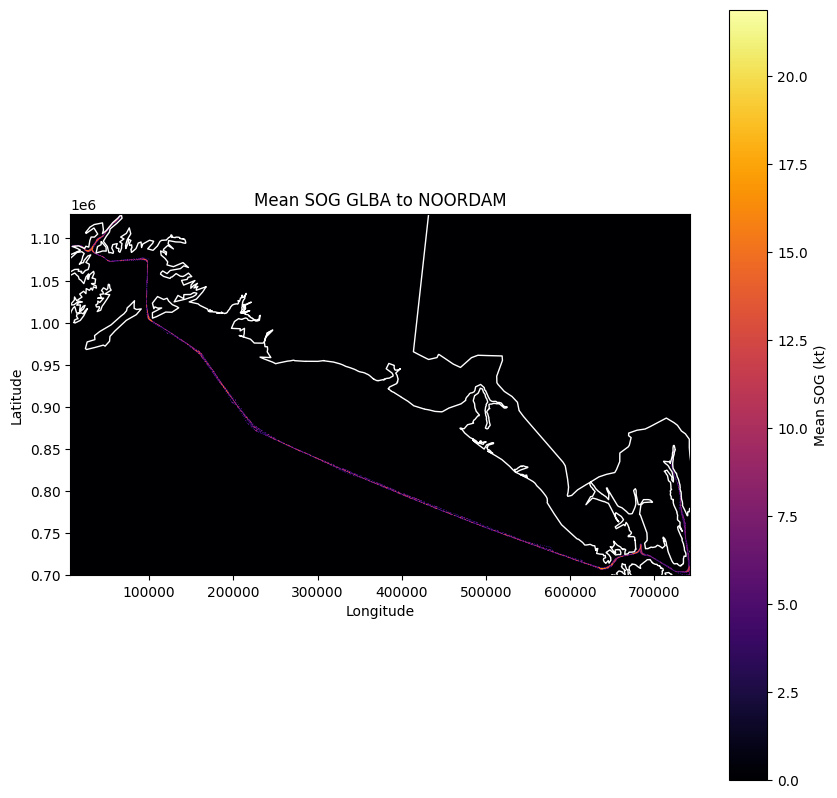

In [80]:
Mapper.plotRaster('NOORDAM', rasters_dict)

#### scratch work area

In [5]:
ais_data = [] # to become gpd.GeoDataFrame()
for boatName, boatData in boatsData.boatsDataDictionary.items():
    print(boatName)
    ais_data.append(boatData.flattenedCruises())
    


NORWEGIAN BLISS
NORWEGIAN JEWEL
EURODAM
NIEUW AMSTERDAM
GRAND PRINCESS
KONINGSDAM
NORWEGIAN SPIRIT
CROWN PRINCESS
NOORDAM
NORWEGIAN ENCORE
RUBY PRINCESS
VOLENDAM
NORWEGIAN SUN
SEABOURN ODYSSEY
VIKING ORION


Vizualize rasters:

Plot raster:

#### Plot rasters using ArcGIS Pro scripting and templates:

### __step 2__: make management alternative maps

* For same grid and map, we’ll want to demonstrate deviation in speeds in a management alternative scenario (e.g., should ships take an extra 30min or 60 mins in Glacier Bay).  What we want to show is that when a ship is going to, e.g., Skagway after Glacier Bay
    * Speed in Glacier Bay drops significantly from actual to modeled alternative
    * Speed from Glacier Bay to next port of call does not increase significantly (e.g., for Haines, Juneau, Skagway) but does increase to other ports of call (e.g., Ketchikan, Wrangell). 
    * I will also get estimates of the SOX and NOX, PM and CO2 for each of these mgmnt alternatives and perhaps we could table those estimates (e.g., total fuel consumed existing vs. mgmnt alt 1, 2, total SOX emitted existing vs. mgmtn 1, 2, etc.). 



# __Stage 2__: CLAA Port Call Data


## __Product 1__: Table of all ships in CLAA data since 2008 – Complete

* Create a table of all ships in CLAA database since 2008

#### using `CalendarParser.py`:

In [ ]:
from CalendarParser import *

folder = r'./calendar/historical_cruise_schedules'

dfs = []

for root, _, files in os.walk(folder):
    for file in files:
        if file.lower().endswith('.pdf'):
            pdf_path = os.path.join(root, file)
            print(pdf_path)
            csv_path = pdf_path.replace('pdf', 'csv')
            year = pdf_path.split('/')[-1][:4]

            parser = CalendarParser(pdf_path, csv_path, year)
            parser.processPDF()
            parser.createDailyRows()
            parser.convertCodesToNames()
            parser.fillNextPorts()
            parser.df.to_csv(parser.csv_path, index=False)
            dfs.append(parser.df)

# Concatenate all DataFrames in the list into one big DataFrame
big_df = pd.concat(dfs, ignore_index=True)

#output statistics for easy cleanup
grouped = big_df.groupby('boatName').size().reset_index(name='count')
grouped.to_csv('./calendar/allyears_allports_claa_groupstats.csv', index=False)

big_df.to_csv('./calendar/allyears_allports_claa.csv')


#### Read the results here:

In [50]:
claa_df = pd.read_csv('./calendar/allyears_allports_claa.csv')
claa_df.sort_values(by='date')


,Unnamed: 0,date,boatName,portCode,ts_in,ts_out,portName,nextPort
24148,24148,2008-04-27,NORWEGIAN STAR,VAN,2008-04-27 07:00:00,2008-04-27 17:00:00,VANCOUVER,AT SEA
23685,23685,2008-04-27,MERCURY,SFO,2008-04-27 07:00:00,2008-04-27 17:00:00,SAN FRANCISCO,AT SEA
23686,23686,2008-04-28,MERCURY,AS,2008-04-28 06:00:00,2008-04-28 22:00:00,AT SEA,AT SEA
23399,23399,2008-04-28,INFINITY,SFO,2008-04-28 07:00:00,2008-04-28 17:00:00,SAN FRANCISCO,AT SEA
24149,24149,2008-04-28,NORWEGIAN STAR,AS,2008-04-28 06:00:00,2008-04-28 22:00:00,AT SEA,KETCHIKAN
...,...,...,...,...,...,...,...,...
40516,40516,2023-10-28,NORWEGIAN SUN,AS,2023-10-28 06:00:00,2023-10-28 22:00:00,AT SEA,VICTORIA
40042,40042,2023-10-28,NORWEGIAN ENCORE,VIC,2023-10-28 20:00:00,2023-10-28 23:59:00,VICTORIA,SEATTLE
40517,40517,2023-10-29,NORWEGIAN SUN,VIC,2023-10-29 08:00:00,2023-10-29 18:00:00,VICTORIA,SEATTLE
40043,40043,2023-10-29,NORWEGIAN ENCORE,SEA,2023-10-29 06:00:00,2023-10-29 17:00:00,SEATTLE,NaN


## __Product 2__: Merged data table that attributes each ship


* Merge with data on ship attributes including size, max pax, etc.  Cruise Critic, lit search, Wiki?
    * Note that CLAA may have scheduled certain ships but stopped doing so
    * Some other ships may have taken on new names
    * Some small ships also likely reduced classic port calls owing to niche for off beaten path routes and ability to visit ports unscheduled.
    * We’ll want to create a ‘floor’ representing a minimum size (GT, Max Pax, LOA) that minimizes or eliminates chance CLAA would not have them listed in their data for port scheduling (we’re focused on ‘large’ cruise ships)
    * We’ll also explore how ships in this class have increase in avg size, GT, MaxPax over the years
    * Histogram of number of unique ships in each year across years


#### Demonstrate ability to merge by mmsi

In [63]:
###### EXAMPLE OF ATTRIBUTING CLAA DATA WITH MMSI INFO #####

ports = claa_df[['date', 'boatName','portName', 'nextPort']]
ports = ports[ports['portName']!= 'AT SEA']
ports[['mmsi', 'length', 'width', 'pax', 'gross_tonnage']] = None
ports['year'] = pd.to_datetime(ports['date']).dt.year

ports


,date,boatName,portName,nextPort,mmsi,length,width,pax,gross_tonnage,year
0,2010-05-03,AMSTERDAM,SEATTLE,AT SEA,None,None,None,None,None,2010
2,2010-05-05,AMSTERDAM,GLACIER BAY,JUNEAU,None,None,None,None,None,2010
3,2010-05-06,AMSTERDAM,JUNEAU,SITKA,None,None,None,None,None,2010
4,2010-05-07,AMSTERDAM,SITKA,KETCHIKAN,None,None,None,None,None,2010
5,2010-05-08,AMSTERDAM,KETCHIKAN,VICTORIA,None,None,None,None,None,2010
...,...,...,...,...,...,...,...,...,...,...
68370,2019-09-27,WESTERDAM,KETCHIKAN,AT SEA,None,None,None,None,None,2019
68372,2019-09-29,WESTERDAM,VANCOUVER,AT SEA,None,None,None,None,None,2019
68374,2019-10-01,WESTERDAM,JUNEAU,NaN,None,None,None,None,None,2019
68375,2019-09-10,WORLD OF RESIDENSE,NOME,NOME,None,None,None,None,None,2019


#### scratch

In [100]:
print('Ports planned on CLAA between 2008 and 2023')
print()
values = ports.portName.value_counts()
for e in ports.portName.unique():
    print(f'{e} : {values[e]}')

Ports planned on CLAA between 2008 and 2023

SEATTLE : 3045
GLACIER BAY : 3238
JUNEAU : 7639
SITKA : 2420
KETCHIKAN : 6945
VICTORIA : 3157
SKAGWAY : 5645
ANCHORAGE : 90
HOMER : 97
KODIAK : 229
HUBBARD GLACIER : 2364
TRACY ARM : 3399
ASTORIA : 120
VANCOUVER : 3257
MISTY FJORD : 381
COLLEGE FJORD : 890
SEWARD : 960
NOME : 93
ST. MATHEW : 32
ST. PAUL : 45
DUTCH HARBOR : 130
ICY BAY : 40
ENDICOTT ARM : 834
PETERSBURG : 793
PRINCE RUPERT : 345
ALERT BAY : 90
KAKE : 50
ELFIN COVE : 38
ADAK : 12
ATTU : 20
LOS ANGELES : 104
WHITTIER : 612
SAN FRANCISCO : 479
POINT BARROW : 27
POINT SOPHIA : 463
SAN DIEGO : 39
NANAIMO : 38
Unknown : 90
HAINES : 731
BARTLETT COVE : 768
VALDEZ : 96
WRANGELL : 362
METLAKATLA : 107
CORDOVA : 59
ICY STRAIT POINT : 979
COLD BAY : 1
PELICAN : 6
KENAI FJORD : 41
BARONOF WARM SPRINGS : 1
GUSTAVUS : 1


#### Use `matplotlib` to visualize changes in port calls

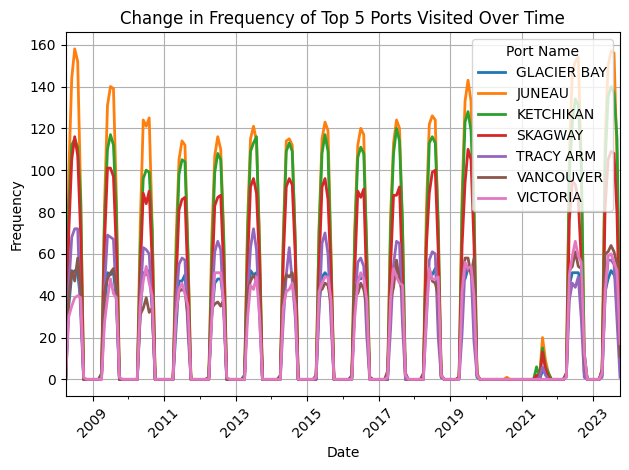

In [52]:
import matplotlib.pyplot as plt 

df = ports

df['date'] = pd.to_datetime(df['date'])

total_counts = df['portName'].value_counts()

top_locations = total_counts.head(7).index
filtered_df = df[df['portName'].isin(top_locations)]

filtered_df.set_index('date', inplace=True)

weekly_counts = filtered_df.groupby('portName').resample('M').size().unstack(fill_value=0)

# Transpose the DataFrame to have time on the x-axis and port names on the y-axis
weekly_counts = weekly_counts.T

# Plot the change in frequency for each portName over time
weekly_counts.plot(kind='line', linestyle='-', marker='', linewidth=2)
plt.title('Change in Frequency of Top 5 Ports Visited Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title='Port Name')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Adapt for other visualization

In [40]:
claa_df.boatName.value_counts()


VOLENDAM               2073
MILLENNIUM             1853
RADIANCE OF THE SEA    1805
WESTERDAM              1725
NORWEGIAN JEWEL        1629
                       ... 
LE COMMANDANT             4
NG ENDURENCE              3
OF RESIDENSE              1
LE COMMANDANT CHA         1
SKY                       1
Name: boatName, Length: 134, dtype: int64

In [48]:
ships = claa_df.boatName.value_counts()
ships

VOLENDAM               2073
MILLENNIUM             1853
RADIANCE OF THE SEA    1805
WESTERDAM              1725
NORWEGIAN JEWEL        1629
                       ... 
LE COMMANDANT             4
NG ENDURENCE              3
OF RESIDENSE              1
LE COMMANDANT CHA         1
SKY                       1
Name: boatName, Length: 134, dtype: int64

## __Product 3__: Analytics of Port Calls since 2008

#### Produce histogram of change in unique port calls

* Create a table of all port calls listed since 2008
    * Histogram of number of unique ports in a year and how this varies across years
    * Create a publishable quality map showing those port calls, including ‘glacial fjords’

### Produce bar chart using `matplotlib`

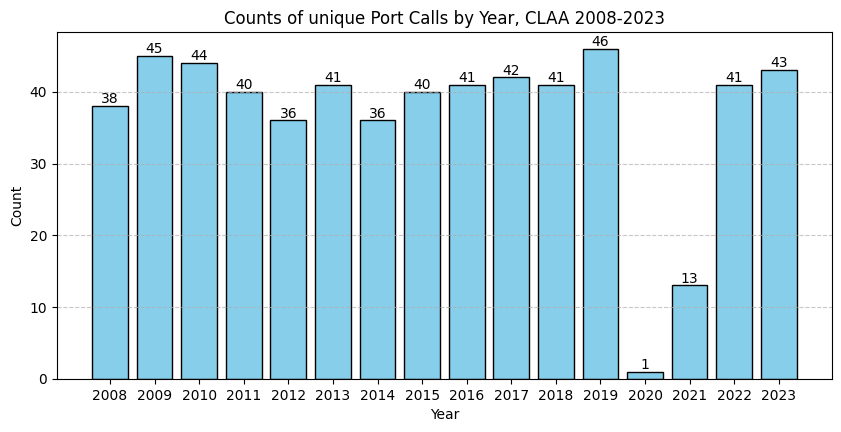

In [56]:
portChanges = pd.DataFrame()

grouped = ports.groupby('year', dropna = True)
for year, group in grouped:
        unique_ports = len(group.portName.unique())
        new_row = {'year' : year,
                   'unique_ports' : unique_ports}
        portChanges = pd.concat([portChanges, pd.DataFrame([new_row])])

plt.figure(figsize=(10,4.5))
bars = plt.bar(portChanges['year'], portChanges['unique_ports'], color='skyblue', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of unique Port Calls by Year, CLAA 2008-2023')
plt.xticks(portChanges['year']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Show the plot
plt.show()

unique number of boats see if it decreases

#### Populate boat attributes by name and vessel ID 

In [36]:
boats_catalog = set(claa_df.boatName.dropna().unique())



In [149]:
glba_ais_data.imo = glba_ais_data.imo.astype(int).astype(str)
imo_catalog = glba_ais_data[['imo', 'name', 'width', 'length', 'shiptype']]
print(imo_catalog.name.unique())
print()
print(imo_catalog.imo.unique())


['NORWEGIAN BLISS' 'NORWEGIAN JEWEL' 'EURODAM' 'NIEUW AMSTERDAM'
 'GRAND PRINCESS' 'KONINGSDAM' 'NORWEGIAN SPIRIT' 'CROWN PRINCESS'
 'NOORDAM' 'NORWEGIAN ENCORE' 'RUBY PRINCESS' 'VOLENDAM' 'NORWEGIAN SUN'
 'SEABOURN ODYSSEY' 'VIKING ORION']

['9751509' '9304045' '9378448' '9378450' '9104005' '9692557' '9141065'
 '9293399' '9230115' '9751511' '9378462' '9156515' '9218131' '9417086'
 '9796250']


In [52]:
claa_df_clean = claa_df[claa_df['portName'] != 'AT SEA']
set(claa_df_clean['portName'])

{'ADAK',
 'ALERT BAY',
 'ANCHORAGE',
 'ASTORIA',
 'ATTU',
 'BARONOF WARM SPRINGS',
 'BARTLETT COVE',
 'COLD BAY',
 'COLLEGE FJORD',
 'CORDOVA',
 'DUTCH HARBOR',
 'ELFIN COVE',
 'ENDICOTT ARM',
 'GLACIER BAY',
 'GUSTAVUS',
 'HAINES',
 'HOMER',
 'HUBBARD GLACIER',
 'ICY BAY',
 'ICY STRAIT POINT',
 'JUNEAU',
 'KAKE',
 'KENAI FJORD',
 'KETCHIKAN',
 'KODIAK',
 'LOS ANGELES',
 'METLAKATLA',
 'MISTY FJORD',
 'NANAIMO',
 'NOME',
 'PELICAN',
 'PETERSBURG',
 'POINT BARROW',
 'POINT SOPHIA',
 'PRINCE RUPERT',
 'SAN DIEGO',
 'SAN FRANCISCO',
 'SEATTLE',
 'SEWARD',
 'SITKA',
 'SKAGWAY',
 'ST. MATHEW',
 'ST. PAUL',
 'TRACY ARM',
 'Unknown',
 'VALDEZ',
 'VANCOUVER',
 'VICTORIA',
 'WHITTIER',
 'WRANGELL'}

### Stage 2

* From 2008 - 2024, for large cruise ships, how does
    * The number of ships calling to each port change (JNU, KTN, Endicott, Disenchantment Bay)
    * The number of (max) passengers calling to each port change
    * The first day of a ship making call and last day of season a ship makes call change

In [83]:
### Calculate statistics per port per year and display table
# ports = claa_df with a few append cols
ports = ports[['date', 'boatName', 'portName', 'year', 'pax', 'length', 'width', 'gross_tonnage']]

stats_list = []
grouped = ports.groupby(['portName', 'year'])

for (port, year), group in grouped:
    first_call = min(group.date)
    last_call = max(group.date)

    cumulative_pax = group['pax'].sum()
    count_calls = group['boatName'].count()
    mean_width = group['width'].mean()
    mean_length = group['length'].mean()
    count_unique = len(group['boatName'].unique())
    
    stats = {
        'portName': port,
        'year': year,
        'count_calls' : count_calls,
        'count_unique' : count_unique, # number of unique boats visiting each port per year
        'max_pax' : cumulative_pax,
        'first_call' : first_call,
        'last_call' : last_call,
        'mean_width' : mean_width,
        'mean_length' : mean_length
    }
    stats_list.append(stats)

stats_df = pd.DataFrame(stats_list)
stats_df


,portName,year,count_calls,count_unique,max_pax,first_call,last_call,mean_width,mean_length
0,ADAK,2008,1,1,0,2008-09-09,2008-09-09,NaN,NaN
1,ADAK,2009,1,1,0,2009-09-13,2009-09-13,NaN,NaN
2,ADAK,2010,1,1,0,2010-08-04,2010-08-04,NaN,NaN
3,ADAK,2011,1,1,0,2011-06-24,2011-06-24,NaN,NaN
4,ADAK,2012,1,1,0,2012-07-07,2012-07-07,NaN,NaN
...,...,...,...,...,...,...,...,...,...
583,WRANGELL,2018,30,5,0,2018-05-25,2018-10-03,NaN,NaN
584,WRANGELL,2019,37,8,0,2019-05-21,2019-10-03,NaN,NaN
585,WRANGELL,2021,3,1,0,2021-08-01,2021-09-12,NaN,NaN
586,WRANGELL,2022,62,10,0,2022-05-12,2022-09-25,NaN,NaN


In [88]:
grouped = stats_df.groupby('portName')
for port, group in grouped:
    if port == 'GLACIER BAY':
        c = group
c

,portName,year,count_calls,count_unique,max_pax,first_call,last_call,mean_width,mean_length
134,GLACIER BAY,2008,225,16,0,2008-05-06,2008-09-23,NaN,NaN
135,GLACIER BAY,2009,224,16,0,2009-04-29,2009-09-28,NaN,NaN
136,GLACIER BAY,2010,220,15,0,2010-05-05,2010-09-27,NaN,NaN
137,GLACIER BAY,2011,200,14,0,2011-05-10,2011-09-22,NaN,NaN
138,GLACIER BAY,2012,210,16,0,2012-04-13,2012-09-26,NaN,NaN
139,GLACIER BAY,2013,233,16,0,2013-04-26,2013-09-26,NaN,NaN
140,GLACIER BAY,2014,230,14,0,2014-04-27,2014-09-26,NaN,NaN
141,GLACIER BAY,2015,222,17,0,2015-05-05,2015-09-25,NaN,NaN
142,GLACIER BAY,2016,225,16,0,2016-04-28,2016-10-02,NaN,NaN
143,GLACIER BAY,2017,241,19,0,2017-05-02,2017-10-01,NaN,NaN




* Create a table of ship port-to-port calls (all empirical, not theoretical)
    * E.g., For all ships across all years, those that visited Juneau made port of call the next day to SKG, KTN,
* Include in that table the distances between those (perhaps we could get AIS data for 2024 that reflects those routes and assume these same routes are used by ships in the past, recognizing a lot of changes in policy and law influenced their routes including donut holes).
    
     

In [64]:
# first, we need to calculate the distances between each port and next port for rows in the CLAA data (ports)
# 

# ports['toDist'] = PathCalculations.distanceAlongPath_nm(portName, nextPort)
# ports['toTime'] = PathCalculations.timelapseAlongPath(portName, nextPort)


,date,boatName,portName,nextPort,mmsi,length,width,pax,gross_tonnage,year
0,2010-05-03,AMSTERDAM,SEATTLE,AT SEA,None,None,None,None,None,2010
2,2010-05-05,AMSTERDAM,GLACIER BAY,JUNEAU,None,None,None,None,None,2010
3,2010-05-06,AMSTERDAM,JUNEAU,SITKA,None,None,None,None,None,2010
4,2010-05-07,AMSTERDAM,SITKA,KETCHIKAN,None,None,None,None,None,2010
5,2010-05-08,AMSTERDAM,KETCHIKAN,VICTORIA,None,None,None,None,None,2010
...,...,...,...,...,...,...,...,...,...,...
68370,2019-09-27,WESTERDAM,KETCHIKAN,AT SEA,None,None,None,None,None,2019
68372,2019-09-29,WESTERDAM,VANCOUVER,AT SEA,None,None,None,None,None,2019
68374,2019-10-01,WESTERDAM,JUNEAU,NaN,None,None,None,None,None,2019
68375,2019-09-10,WORLD OF RESIDENSE,NOME,NOME,None,None,None,None,None,2019


In [ ]:
average_distances = pd.DataFrame(columns = ['fromPort', 'toPort', 'avg_nm', 'avg_time'])
endpoints = ports.portName.unique()

for e in endpoints:
    # PathCalculations.distanceAlongPath(e, [toPort for toPort in endport if toPort != e])
    # scratch area to think through how to build this table
    pass

* How does average distance between routes change over time?  E.g., in 2008, the average port of call distance was X but in 2018 it was Y and in 2024 it was Z (?)

using `matplotlib`:

In [89]:
distances = pd.DataFrame()
stats_list = []

grouped = ports.groupby('year', dropna = True)
for year, group in grouped:
    avg_dist = group['toDist'].mean()
    avg_time = group['toTime'].mean()

    stats = {'year' : year,
                'avg_dist_to_next_port' : avg_dist,
                'avg_time_to_next_port' : avg_time}
    stats_list.append(stats)

distances = pd.concat(pd.DataFrame(stats_list))

plt.figure(figsize=(10,4.5))
bars = plt.bar(distances['year'], distances['avg_dist_to_next_port'], color='skyblue', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Distance (nm)')
plt.title('Mean Distance to Next Port by Year, CLAA 2008-2023')
plt.xticks(portChanges['year']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')
    
plt.show()

KeyError: 'toDist'

* How does the glacier as destination change over time?  Frequency of calls, etc.
* Tracy arm, hubbard glacier. Reflection of the trend over the next couple of decades with direct link to climate change.